<center><h1>Assignment 6(Day 6)</h1></center>

In [37]:
import warnings
warnings.filterwarnings('default')


<h3>Question 1:- Treat the data to replace all missing data with median / mode (whichever applicable), and remove all rows with outliers in column: ‘Price’</h3>

In [1]:
#Answer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('Dataset_Day6.csv') # Creating data frame from the csv.

print(df.info())                     # Printing the information for the dataset.

print(df.isna().sum())               # Checking for null and NaN values in the dataset.

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Parking      1226 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 88.6+ KB
None
Area            0
BHK             0
Bathroom        2
Furnishing      5
Parking        33
Price           0
Status          0
Transaction     0
Type            5
dtype: int64
         Area  BHK  Bathroom      Furnishing  Parking     Price  \
0       800.0    3       2.0  Semi-Furnished      1.0   6500000   
1       750.0    2       2.0  Semi-Furnished      1.0  

In [2]:
statistics = df.describe()          # Descriptive statistics for each columns.
print(statistics)

               Area          BHK     Bathroom      Parking         Price
count   1259.000000  1259.000000  1257.000000  1226.000000  1.259000e+03
mean    1466.452724     2.796664     2.556086     1.935563  2.130670e+07
std     1568.055040     0.954425     1.042220     6.279212  2.560115e+07
min       28.000000     1.000000     1.000000     1.000000  1.000000e+06
25%      800.000000     2.000000     2.000000     1.000000  5.700000e+06
50%     1200.000000     3.000000     2.000000     1.000000  1.420000e+07
75%     1700.000000     3.000000     3.000000     2.000000  2.550000e+07
max    24300.000000    10.000000     7.000000   114.000000  2.400000e+08


In [3]:
value=df['Bathroom'].mode()       # Replacing the missing data for 'Bathroom',since it is a catagorical variable we use mode. 
value=value.to_numpy()            # Since the .mode() function is returning a panda series we take a numpy
                                  # array of it and its index 1(2nd) value.

df['Bathroom'].fillna(value[0], inplace=True)

#------------------------------------------------------------------------------------------------------------------------------

value=df['Furnishing'].mode()     # Replacing the missing data for 'Furnishing',since it is a catagorical variable we use mode. 
value=value.to_numpy()            # Since the .mode() function is returning a panda series we take a numpy
                                  # array of it and its index 1(2nd) value.

df['Furnishing'].fillna(value[0], inplace=True)

#------------------------------------------------------------------------------------------------------------------------------

value=df['Parking'].mode()        # Replacing the missing data for 'Parking',since it is a catagorical variable we use mode. 
value=value.to_numpy()            # Since the .mode() function is returning a panda series we take a numpy
                                  # array of it and its index 1(2nd) value.

df['Parking'].fillna(value[0], inplace=True)

#-----------------------------------------------------------------------------------------------------------------------------

value=df['Type'].mode()           # Replacing the missing data for 'Type',since it is a catagorical variable we use mode. 
value=value.to_numpy()            # Since the .mode() function is returning a panda series we take a numpy
                                  # array of it and its index 1(2nd) value.

df['Type'].fillna(value[0], inplace=True)

In [4]:
df["BHK"] = df["BHK"].astype(str)
df["Bathroom"] = df["Bathroom"].astype(str)
df["Parking"] = df["Parking"].astype(str)

In [5]:
print(df.isna().sum())               # Checking for null and NaN values in the dataset after filling missing values.

Area           0
BHK            0
Bathroom       0
Furnishing     0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   object 
 2   Bathroom     1259 non-null   object 
 3   Furnishing   1259 non-null   object 
 4   Parking      1259 non-null   object 
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1259 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 88.6+ KB


<Axes: >

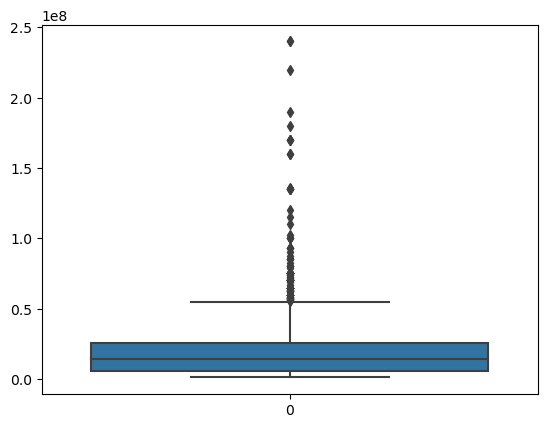

In [7]:
sns.boxplot(df["Price"])     # Before Outlier Removal.

In [8]:
# Removing the outliers from the 'Price' column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)

df = df[~outliers]

print(df)

         Area BHK Bathroom      Furnishing Parking     Price         Status  \
0       800.0   3      2.0  Semi-Furnished     1.0   6500000  Ready_to_move   
1       750.0   2      2.0  Semi-Furnished     1.0   5000000  Ready_to_move   
2       950.0   2      2.0       Furnished     1.0  15500000  Ready_to_move   
3       600.0   2      2.0  Semi-Furnished     1.0   4200000  Ready_to_move   
4       650.0   2      2.0  Semi-Furnished     1.0   6200000  Ready_to_move   
...       ...  ..      ...             ...     ...       ...            ...   
1254   4118.0   4      5.0     Unfurnished     3.0  55000000  Ready_to_move   
1255   1050.0   3      2.0  Semi-Furnished     3.0  12500000  Ready_to_move   
1256    875.0   3      3.0  Semi-Furnished     3.0  17500000  Ready_to_move   
1257    990.0   2      2.0     Unfurnished     1.0  11500000  Ready_to_move   
1258  11050.0   3      3.0     Unfurnished     1.0  18500000  Ready_to_move   

       Transaction           Type  
0     New_Prope

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1155 non-null   float64
 1   BHK          1155 non-null   object 
 2   Bathroom     1155 non-null   object 
 3   Furnishing   1155 non-null   object 
 4   Parking      1155 non-null   object 
 5   Price        1155 non-null   int64  
 6   Status       1155 non-null   object 
 7   Transaction  1155 non-null   object 
 8   Type         1155 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 90.2+ KB
None


<Axes: >

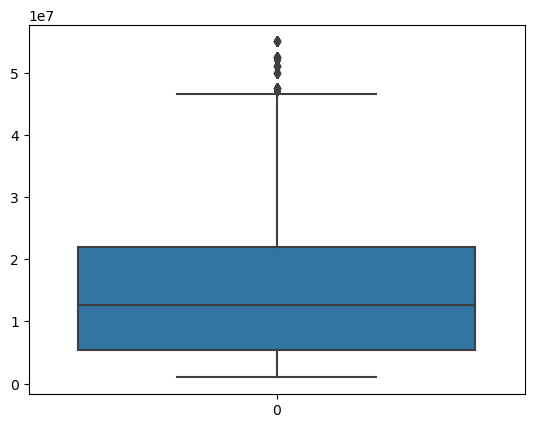

In [10]:
sns.boxplot(df['Price'])    # After Removing the outliers.

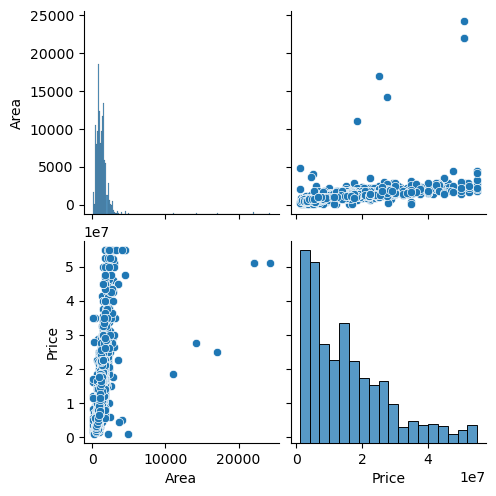

In [11]:
sns.pairplot(df)

<h3>Question 2:- Use One Hot Encoding to encode all character variables.<h/h3>

In [12]:
#Answer
df_encoded = pd.get_dummies(df)
df = df_encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1258
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Area                       1155 non-null   float64
 1   Price                      1155 non-null   int64  
 2   BHK_1                      1155 non-null   uint8  
 3   BHK_10                     1155 non-null   uint8  
 4   BHK_2                      1155 non-null   uint8  
 5   BHK_3                      1155 non-null   uint8  
 6   BHK_4                      1155 non-null   uint8  
 7   BHK_5                      1155 non-null   uint8  
 8   BHK_6                      1155 non-null   uint8  
 9   BHK_7                      1155 non-null   uint8  
 10  Bathroom_1.0               1155 non-null   uint8  
 11  Bathroom_2.0               1155 non-null   uint8  
 12  Bathroom_3.0               1155 non-null   uint8  
 13  Bathroom_4.0               1155 non-null   uint8

<h3>Question 3:-<br><br> (a) Split the data into 80% training and 20% testing data.<br><br> (b) Then, create a multiple linear regression model with target variable as ‘Price’.<br><br> (c) Print the model performance metrics. R^2, Adjusted R^2, MAE</h3>

In [13]:
#Answer
from sklearn.model_selection import train_test_split

# Data Splitting

x = df.drop("Price",axis=1)
y = df["Price"]    # Making dataframe y from the 'Price' column of dataframe.

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 50)

In [14]:
#Answer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

lm = LinearRegression()                            # Calling and fitting the model on training dataset.
lm = lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)                        # Predicting using test dataset

print(f"Scale Parameter:- {lm.coef_}\n")           # Scale parameter
print(f"Intercept Parameter:- {lm.intercept_}\n")  # Intercept parameter

print(f"The Mean Absolute Error:- {mean_absolute_error(y_test, y_pred)}\n")  # MAE
print(f"The Mean Squared Error:- {mean_squared_error(y_test, y_pred)}\n")    # MSE

n = len(y)
k = x.shape[1]
temp = r2_score(y_test, y_pred)*100
adjusted_r = 1 - (1 - temp) * (n - 1) / (n - k - 1)

print(f"R^2 Score:- \t{r2_score(y_test, y_pred)*100} %\n")
print(f"Adjusted R^2 Score:- {adjusted_r} %\n")

Scale Parameter:- [ 1.26198815e+03 -1.46055296e+05 -1.25935637e+07  1.49606126e+06
  4.06254408e+06  5.27703560e+06  9.78216543e+06 -7.98043150e+06
  1.02244086e+05 -1.38781907e+07 -1.02128357e+07 -1.40361390e+06
  7.24388606e+06  1.57703463e+07  2.48040790e+06 -8.15318898e+04
  1.25540459e+05 -4.40085695e+04 -1.26920613e+06 -3.72529030e-09
 -4.69309247e+05  3.74379707e+06  6.87084367e+06 -5.10088598e+05
 -4.66714440e+05 -7.89932233e+06  3.59646332e+05 -3.59646332e+05
 -3.49586104e+05  3.49586104e+05  1.04725615e+05 -1.04725615e+05]

Intercept Parameter:- 16871288.89384168

The Mean Absolute Error:- 6824533.158323205

The Mean Squared Error:- 79725790130170.88

R^2 Score:- 	54.54537037226261 %

Adjusted R^2 Score:- 56.07251106024158 %



<h3>Question 4:- Repeat the above process for a Ridge Regression and show from the new evaluation metrics if there is any improvement in the model performance?</h3>

In [35]:
#Answer
from sklearn.linear_model import Ridge

alpha = [1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
print(f"alpha taken:- {alpha}\n")


mse = mean_squared_error(y_test,y_pred)
print('Mean Square Error is {}\n'.format(mse))

best_r2 = 0
best_alpha = 0
best_mse = mse
for param in alpha:
    ridgeModel=Ridge(alpha = param)
    ridgeModel.fit(x_train, y_train)
    
    y_pred = ridgeModel.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    
    r2 = r2_score(y_test,y_pred)
    print(f"R^2 Score:- {r2} for alpha:-{param}")    
    
    if(r2 > best_r2):
        best_r2=r2
    
    if(mse < best_mse):
        best_mse = mse
        best_alpha = param

print("\nBest value of alpha/lambda = {}".format(best_alpha))
print("MSE for this alpha/lambda = {}".format(best_mse))
print("Best R Squared score = {}".format(best_r2*100))

alpha taken:- [1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]

Mean Square Error is 79791296486334.9

R^2 Score:- 0.545454763617895 for alpha:-1e-10
R^2 Score:- 0.5454537143941807 for alpha:-1e-08
R^2 Score:- 0.5454539996754503 for alpha:-0.001
R^2 Score:- 0.5454566523274553 for alpha:-0.01
R^2 Score:- 0.5456187978064224 for alpha:-1
R^2 Score:- 0.5447411271113316 for alpha:-5
R^2 Score:- 0.5422797859260431 for alpha:-10
R^2 Score:- 0.53608031430714 for alpha:-20
R^2 Score:- 0.529582094727102 for alpha:-30
R^2 Score:- 0.5263599800843637 for alpha:-35
R^2 Score:- 0.5231748447756173 for alpha:-40
R^2 Score:- 0.5200314584132824 for alpha:-45
R^2 Score:- 0.5169318148352268 for alpha:-50
R^2 Score:- 0.5138766062247757 for alpha:-55
R^2 Score:- 0.48833327762354994 for alpha:-100

Best value of alpha/lambda = 1
MSE for this alpha/lambda = 79696833219985.31
Best R Squared score = 54.56187978064224


<B>Since the best R^2 score is 54.56 in ridge regression and 54.54 in linear regression we can say that there is minimal improvement in the model performance.</B>

<h3>Question 5:- Also do above for Lasso Regression.</h3>

In [36]:
from sklearn.linear_model import Lasso

alpha = [1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
print(f"alpha taken:- {alpha}\n")

mse = mean_squared_error(y_test,y_pred)
print('Mean Square Error is {}\n'.format(mse))

best_r2 = 0
best_alpha = 0
best_mse = mse
for param in alpha:
    lassoModel=Lasso(alpha = param)
    lassoModel.fit(x_train, y_train)
    
    y_pred = lassoModel.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)

    r2 = r2_score(y_test,y_pred)
    print(f"R^2 Score:- {r2} for alpha:-{param}")    
    
    if(r2 > best_r2):
        best_r2=r2
        
    if(mse < best_mse):
        best_mse = mse
        best_alpha = param

print("Best value of alpha/lambda = {}".format(best_alpha))
print("MSE for this alpha/lambda = {}".format(best_mse))
print("Best R Squared score = {}".format(best_r2*100))

alpha taken:- [1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]

Mean Square Error is 89744508004712.62

R^2 Score:- 0.5447422502817957 for alpha:-1e-10
R^2 Score:- 0.5447422502818332 for alpha:-1e-08
R^2 Score:- 0.5447422540754416 for alpha:-0.001
R^2 Score:- 0.5447422882178724 for alpha:-0.01
R^2 Score:- 0.5447460396355919 for alpha:-1
R^2 Score:- 0.544761111113161 for alpha:-5
R^2 Score:- 0.5447798700028627 for alpha:-10
R^2 Score:- 0.5448167320800623 for alpha:-20
R^2 Score:- 0.5448526817949317 for alpha:-30
R^2 Score:- 0.5448703338563 for alpha:-35
R^2 Score:- 0.5448877707202912 for alpha:-40
R^2 Score:- 0.5449049923869045 for alpha:-45
R^2 Score:- 0.5449219988561407 for alpha:-50
R^2 Score:- 0.5449387901279996 for alpha:-55
R^2 Score:- 0.5450802276927444 for alpha:-100
Best value of alpha/lambda = 100
MSE for this alpha/lambda = 79791296486334.9
Best R Squared score = 54.50802276927445


<B>Since the best R^2 score is 54.50 in Lasso regression and 54.54 in linear regression we can say that there is no improvement in the model performance.</B>